### COURSERA | IBM DATA SCIENCE | BASIC PLOTS
The purpose of this program is to explore basic plots such as area plots, histograms, and bar charts through the MatPlotLib library. <br>
Data regarding Canadian immigration from 1980 to 2013 was used to develop each model. <br>
This program uses Canadian immigration data from the [U.N. website](https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp).

In [1]:
import numpy as np
import pandas as pd

#### PART 1: DOWNLOAD & CLEAN IMMIGRATION DATA

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: done

# All requested packages already installed.



In [3]:
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                    sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.columns = list(map(str, df.columns))
df.set_index('Country', inplace=True)
df['Total'] = df.sum(axis=1)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [5]:
print('Data Dimensions:', df.shape)

Data Dimensions: (195, 38)


#### PART 2: VISUALIZING DATA IN AREA PLOT

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.style.use('ggplot')

In [7]:
years = list(map(str, range(1980, 2014)))
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)
df_top = df.head()
df_top = df_top[years].transpose() 
df_top.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


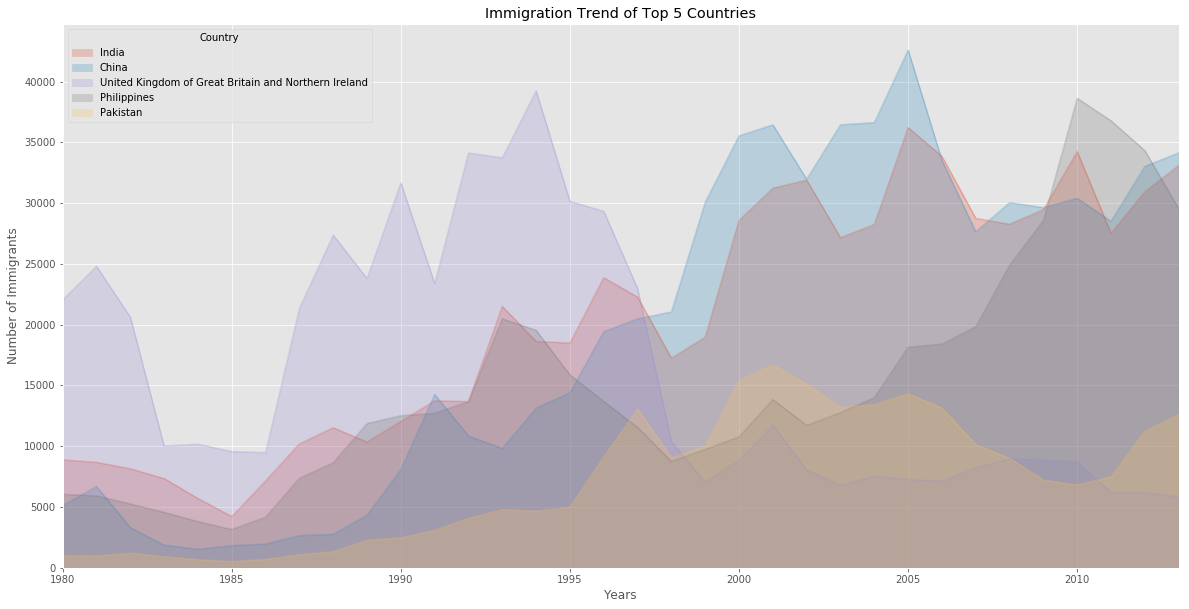

In [8]:
df_top.index = df_top.index.map(int)
df_top.plot(kind='area', alpha=0.25, stacked=False, figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

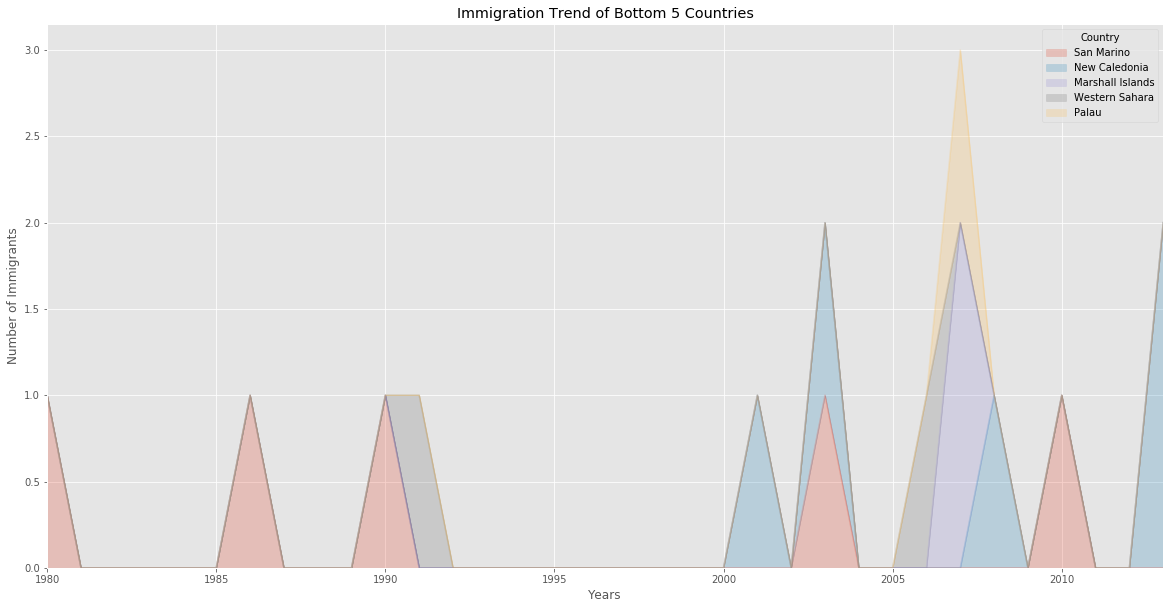

In [9]:
df_bot = df.tail()
df_bot = df_bot[years].transpose()
df_bot.index = df_bot.index.map(int)
df_bot.plot(kind='area', alpha=0.25, figsize=(20, 10))

plt.title('Immigration Trend of Bottom 5 Countries')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

#### PART 3: VISUALIZING DATA IN HISTOGRAM

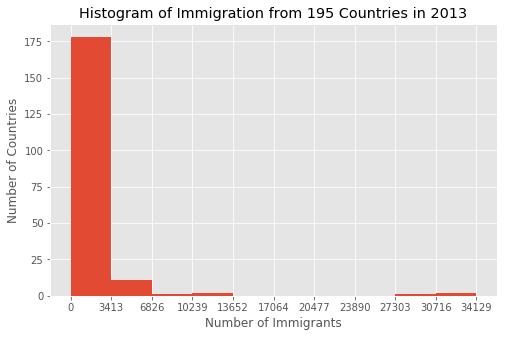

In [10]:
count, bin_edges = np.histogram(df['2013'])
df['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2013') 
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')
plt.show()

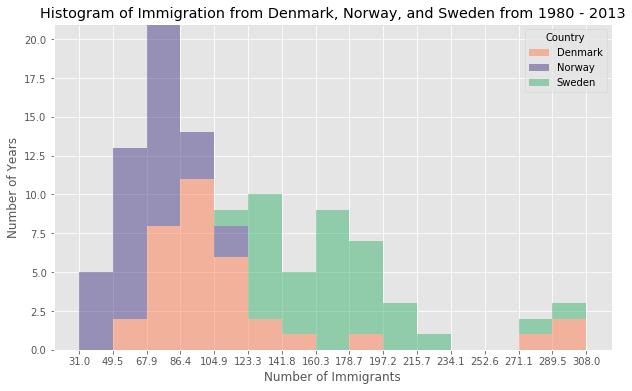

In [11]:
df_eur = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
count, bin_edges = np.histogram(df_eur, 15)

df_eur.plot(kind='hist', figsize=(10, 6), bins=15, alpha=0.5, xticks=bin_edges, color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True)
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 
plt.show()

#### PART 4: VISUALIZING DATA IN BAR CHART

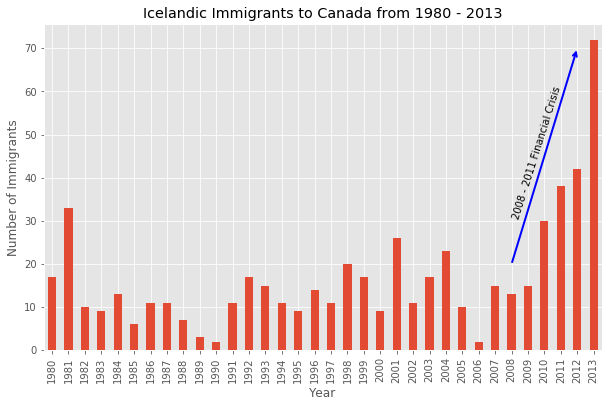

In [12]:
df_ice = df.loc['Iceland', years]
df_ice.plot(kind='bar', figsize=(10, 6), rot=90)

plt.annotate('', xy=(32, 70), xytext=(28, 20), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.annotate('2008 - 2011 Financial Crisis', xy=(28, 30), rotation=72.5, va='bottom', ha='left')

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 - 2013')
plt.show()

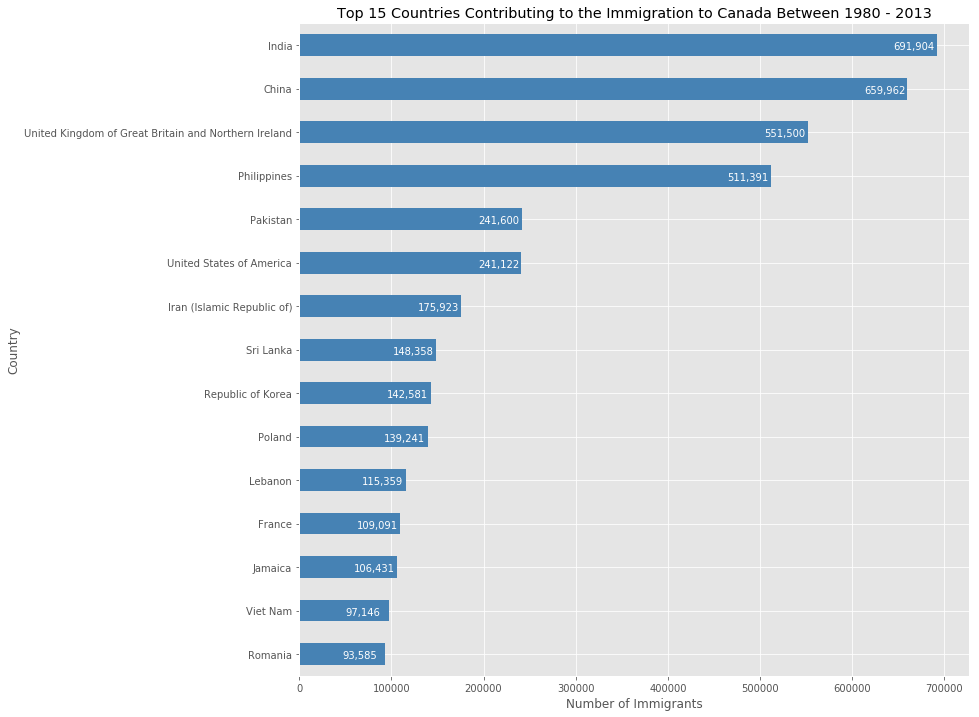

In [13]:
df.sort_values(by='Total', ascending=True, inplace=True)
df_top = df['Total'].tail(15)
df_top.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Countries Contributing to the Immigration to Canada Between 1980 - 2013')

for index, value in enumerate(df_top): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 47000, index - 0.1), color='white')
plt.show()